# Data Wizard

### Final Project Rakamin - Airlines Customer Satisfaction

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.19.2
pandas version :  0.25.3
seaborn version :  0.11.1


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use('default')

In [3]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

# Load and Describe Data

## Load Data

In [4]:
data = pd.read_csv('Invistico_Airline.csv')
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


## Describe Data

In [5]:
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Exploratory Data Analysis (EDA)

## Descriptive Statistics

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
satisfaction                         129880 non-null object
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Seat comfort                         129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Food and drink                       129880 non-null int64
Gate location                        129880 non-null int64
Inflight wifi service                129880 non-null int64
Inflight entertainment               129880 non-null int64
Online support                       129880 non-null int64
Ease of Online booking               129880 non-null int64

Info dataframe:
* Dataframe memiliki total 129880 baris dan 22 kolom
* Dataframe masih memiliki *null* values di kolom `Arrival Delay in Minutes`
* Target klasifikasi adalah kolom `satisfaction` dengan tipe data `object`
* Berarti sisanya adalah *feature*

Karena target `satiscation` masih berupa `object` maka data selanjutnya dirubah menjadi `int64`

In [7]:
data['satisfaction'].replace(('satisfied', 'dissatisfied'), (1, 0), inplace=True)

In [8]:
cats = ['Gender','Customer Type','Type of Travel','Class']
nums = ['satisfaction','Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding','Departure Delay in Minutes','Arrival Delay in Minutes']


In [9]:
data.sample(10)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
107065,1,Female,Loyal Customer,18,Business travel,Business,3270,3,3,3,...,4,4,4,5,5,4,4,4,52,22.0
67940,0,Male,Loyal Customer,71,Business travel,Eco,2522,1,2,2,...,1,1,3,1,3,2,4,1,0,6.0
1952,1,Female,Loyal Customer,43,Personal Travel,Eco,447,4,4,5,...,2,2,4,5,5,5,4,2,0,0.0
123862,1,Female,Loyal Customer,47,Business travel,Business,362,3,3,3,...,5,5,5,5,5,5,5,4,0,0.0
54624,0,Male,disloyal Customer,25,Business travel,Eco,3053,3,3,3,...,5,5,4,4,5,5,4,5,17,19.0
61273,0,Male,disloyal Customer,39,Business travel,Business,1893,4,5,5,...,1,1,4,3,4,3,5,1,0,0.0
36975,0,Male,Loyal Customer,22,Personal Travel,Eco,2073,4,5,4,...,3,4,5,4,5,3,5,4,0,0.0
8804,1,Female,Loyal Customer,21,Personal Travel,Business,2258,5,5,3,...,4,4,5,5,5,3,5,4,0,0.0
78086,0,Female,Loyal Customer,33,Business travel,Business,1843,3,5,5,...,4,3,3,2,3,3,3,2,0,0.0
69063,0,Male,Loyal Customer,11,Business travel,Eco,3159,1,2,2,...,1,1,4,3,4,1,1,1,317,318.0


- Tidak ada kolom yang memberikan unique keys bagi tiap baris
- Kolom `satisfaction` merupakan hasil akhir dari kepuasan pelanggan
- Kolom `Seat Comfort`, `Departure/Arrival time convenient`, `Food and drink`, `Gate location`, `Inflight wifi service`,`Inflight entertainment`,`Online support`,`Ease of Online booking`,`Onboard service`,`Leg room service`,`Baggage handling`,`Checkin service`,`Cleanliness`,`Online boarding` adalah service yang dinilai oleh pelanggan
- Kolom `Departure Delay in Minutes`,`Arrival Delay in Minutes` adalah indikator lain yang dapat menilai performa maskapai dalam melayani pelanggannya

In [10]:
data[nums].describe()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,0.547328,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,0.497757,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Distribusi nilai di kolom `Departure/Arrival time convenient` dan `Gate location` terlihat normal (*mean* dan *median* sama nilainya)
* Kolom  `Departure Delay in Minutes` dan `Arrival Delay in Minutes` memiliki nilai median dan mean yang cukup jauh, menandakan distribusi yang tidak normal

In [11]:
data[cats].describe()

,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,65899,106100,89693,62160


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Semua kolom Categotical memiliki unique value yang sama kecuali `class`

### Value Counting

In [12]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom Gender:
Female    65899
Male      63981
Name: Gender, dtype: int64

Value count kolom Customer Type:
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

Value count kolom Type of Travel:
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

Value count kolom Class:
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64



## Univariate Analysis

### Box plots

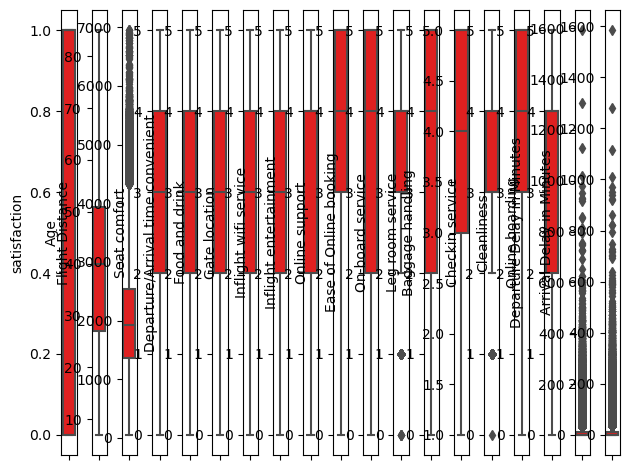

In [13]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='red', orient='v')
    plt.tight_layout()

Keberadaan outlier.
* Outlier terlihat utamanya pada kolom `Flight Distance`,`Departure Delay in Minutes`&`Arrival Delay in Minutes`
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed*: `Departure Delay in Minutes`, `Distance`, `Arrival Delay in Minutes`

### Dist plots

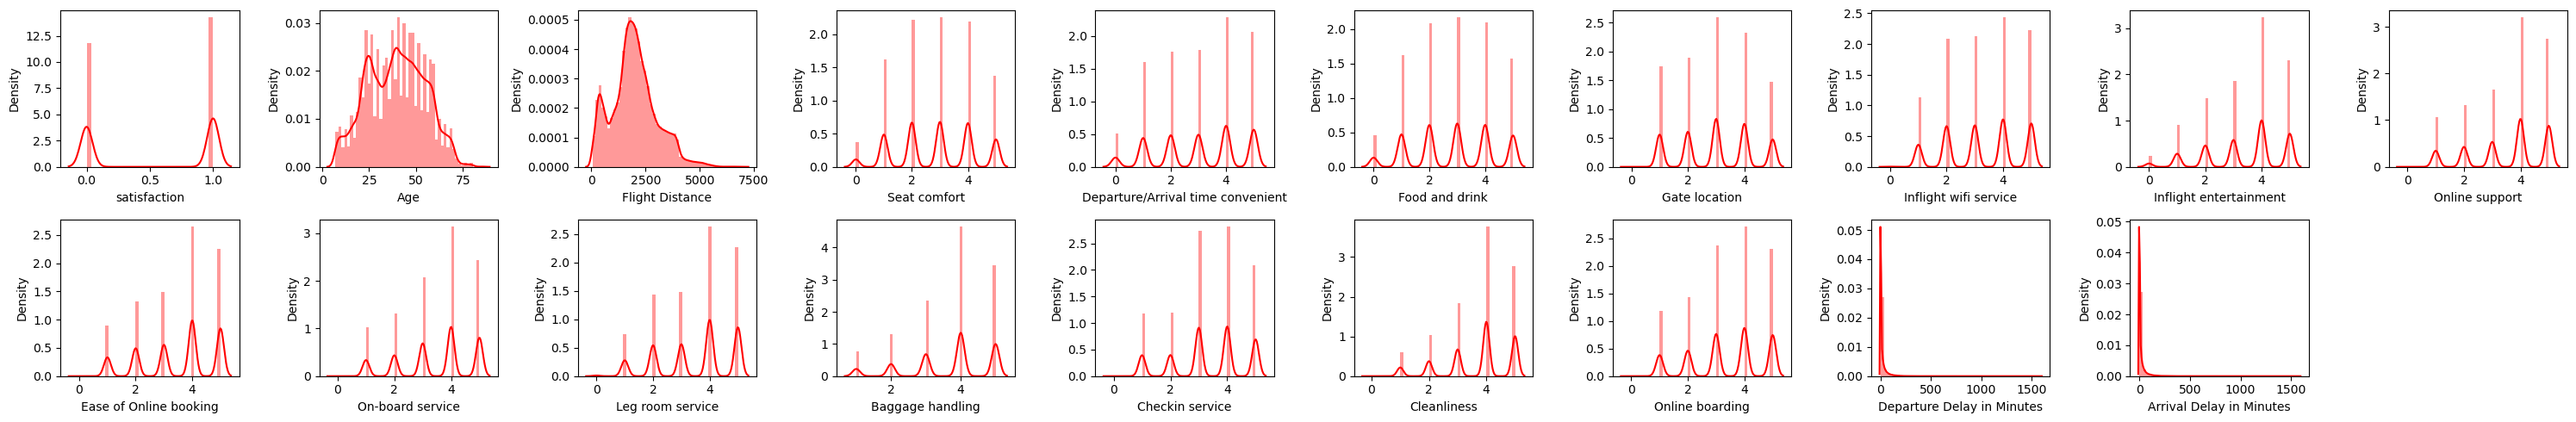

In [14]:
plt.figure(figsize=(30, 5))
for i in range(0, len(nums)):
    plt.subplot(2, 10, i+1)
    sns.distplot(data[nums[i]], color='red')
    plt.tight_layout()

Kolom `Flight Distance`, `Departure Delay in Minutes`, dan `Arrival Delay in Minutes` skewed ke kanan seperti perkiraan.

## Multivariate Analysis

### Correlation heatmap

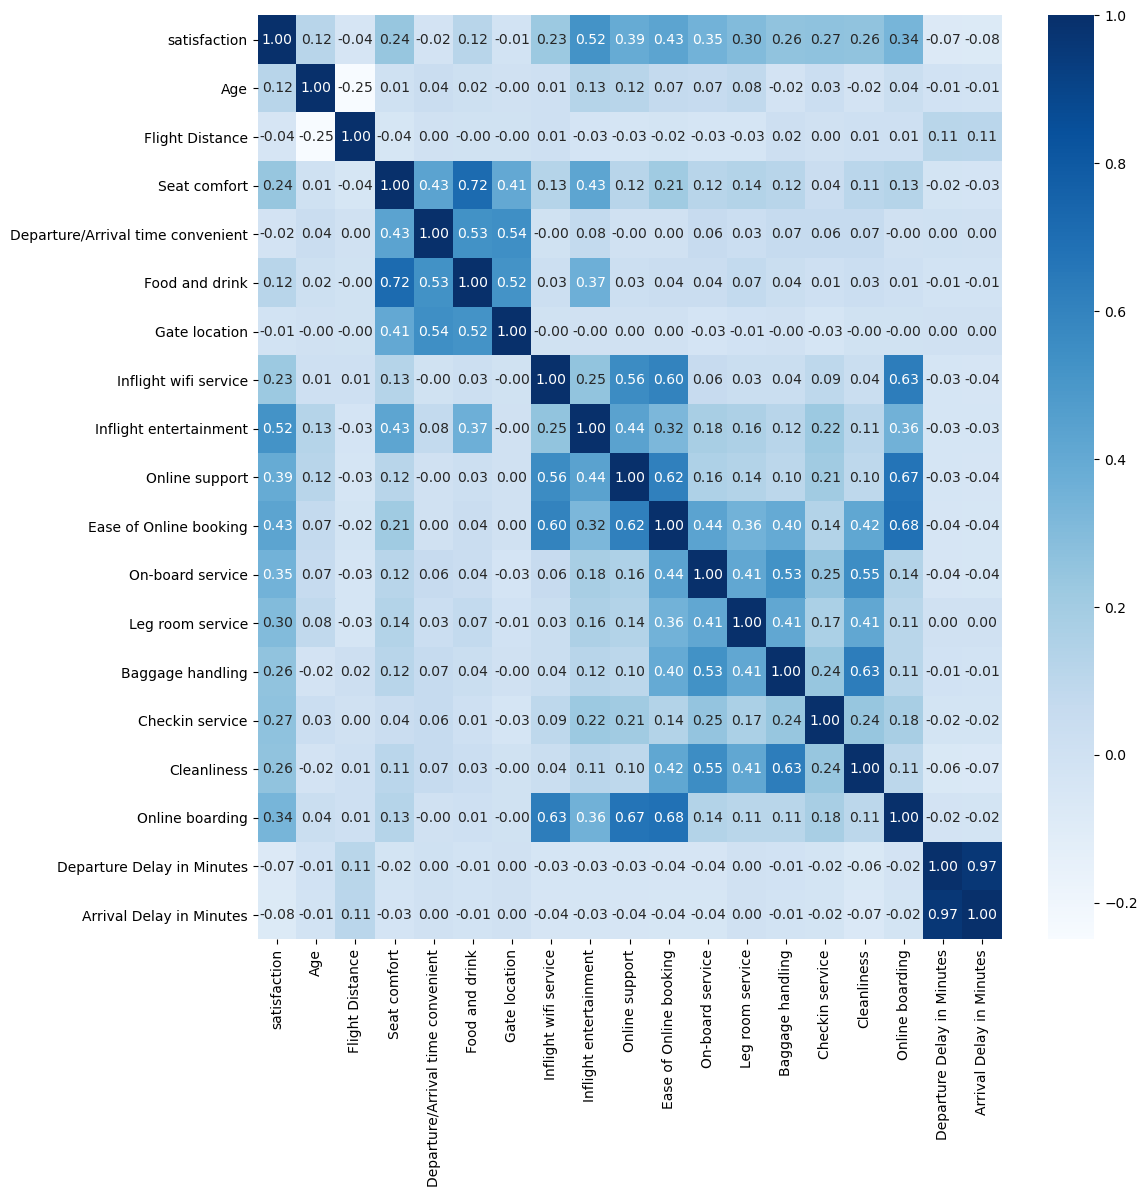

In [15]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:
* Target `satisfaction` memiliki korelasi positif `Age`,`Seat Comfort`, `Food and drink`, `Inflight wifi service`,`Inflight entertainment`,`Online support`,`Ease of Online booking`,`Onboard service`,`Leg room service`,`Baggage handling`,`Checkin service`,`Cleanliness`,`Online boarding`
* Target memiliki korelasi negatif dengan `Flight Distance`,`Departure Time/Arrival Time Convenient`,`Gate Location`,`Departure Delay in Minutes`,`Arrival Delay in Minutes`
* `Departure Delay in Minutes` juga memiliki korelasi positif kuat dengan `Arrival Delay in Minutes`. Ada kemungkinan kedua *feature* ini redundan

### Category plots

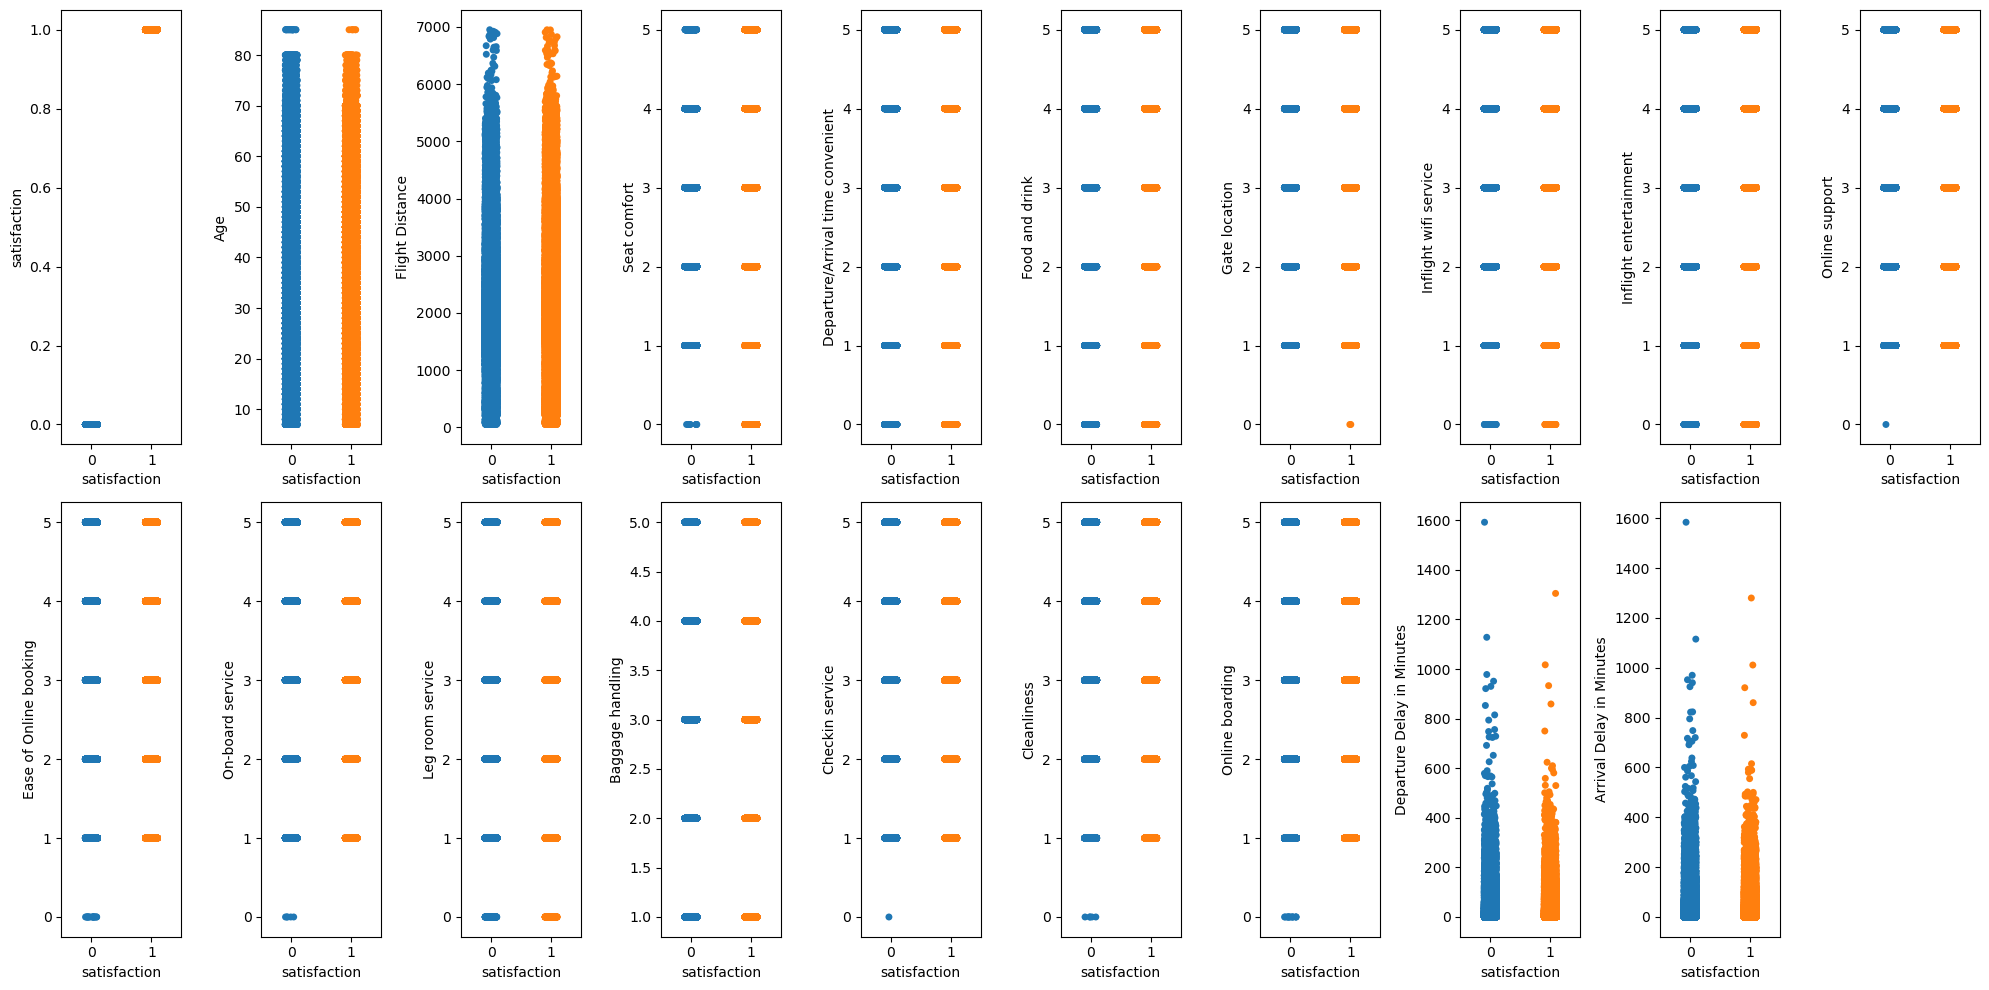

In [16]:
fig = plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    ax = fig.add_subplot(2, 10, i+1)
    sns.stripplot(ax=ax, data=data, x='satisfaction', y=nums[i])
    plt.tight_layout()

    if i != 0: plt.close(i+1)

    plt.close(len(nums) + 1)

Penilaian apakah suatu produk eksklusif atau tidak sama sekali tidak dipengaruhi oleh satupun kolom di atas

## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan
* Ada data-data yang kosong/hilang, harus diurus ketika preprocessing
* Ada beberapa distribusi yang *skewed*

# Data Cleansing

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
satisfaction                         129880 non-null int64
Gender                               129880 non-null object
Customer Type                        129880 non-null object
Age                                  129880 non-null int64
Type of Travel                       129880 non-null object
Class                                129880 non-null object
Flight Distance                      129880 non-null int64
Seat comfort                         129880 non-null int64
Departure/Arrival time convenient    129880 non-null int64
Food and drink                       129880 non-null int64
Gate location                        129880 non-null int64
Inflight wifi service                129880 non-null int64
Inflight entertainment               129880 non-null int64
Online support                       129880 non-null int64
Ease of Online booking               129880 non-null int64


## Missing Data

### Cek total baris yang null di tiap kolomnya

In [18]:
data.isna().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

### Cek persentase data yang null

In [19]:
data_awal = 129880
data_null = 393
data_null_dihapus = data_awal - data_null
persentase_databersih = (data_null_dihapus/data_awal)*100
persentase_datanull = (data_null/data_awal)*100
print('Jumlah baris saat null dihapus:',data_null_dihapus)
print('Persentase data yang tidak null:',persentase_databersih)
print('Persentase data yang null:',persentase_datanull)

Jumlah baris saat null dihapus: 129487
Persentase data yang tidak null: 99.69741299661226
Persentase data yang null: 0.3025870033877425


Karena persentase data null sangat kecil maka dapat kita lakukan penghapusan data yang null.

### Drop baris data yang null

In [20]:
data.dropna(inplace=True)

In [21]:
#Mengecek dimensi data
data.shape

(129487, 23)

In [22]:
#Cek kembali data yang null
data.isna().sum()

satisfaction                         0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

## Duplicated Data

### Cek jumlah data yang duplikat

In [23]:
data.duplicated().sum()

0

Secara keseluruhan tidak ada data yang duplikat

## Outliers

In [24]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))
for col in ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] >= low_limit) & (data[col] <= high_limit)) & filtered_entries
    
data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 129487
Jumlah baris setelah memfilter outlier: 106922


## Normalization/Standardization

In [25]:
data.describe()

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000,106922.000000
mean,0.561624,39.686482,1906.315969,2.853173,2.990002,2.855493,2.986102,3.259844,3.399048,3.535549,3.490068,3.489385,3.496568,3.706814,3.356634,3.731346,3.362376,3.447167,3.527656
std,0.496190,15.123326,946.999899,1.403299,1.532367,1.448015,1.306677,1.317037,1.347307,1.304693,1.304092,1.265528,1.293092,1.158040,1.255833,1.145187,1.297475,6.720426,6.772472
min,0.000000,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,27.000000,1318.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,40.000000,1885.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,1.000000,51.000000,2481.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000
max,1.000000,85.000000,4319.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,30.000000,32.000000


In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [27]:
data['Arrival_norm'] = MinMaxScaler().fit_transform(data['Flight Distance'].values.reshape(len(data), 1))
data['Depart_norm'] = MinMaxScaler().fit_transform(data['Departure Delay in Minutes'].values.reshape(len(data), 1))
data['FlightD_norm'] = MinMaxScaler().fit_transform(data['Arrival Delay in Minutes'].values.reshape(len(data), 1))

In [28]:
data.describe()['Arrival_norm']

count    106922.000000
mean          0.434836
std           0.221832
min           0.000000
25%           0.297084
50%           0.429843
75%           0.569630
max           1.000000
Name: Arrival_norm, dtype: float64

In [29]:
data.describe()['Depart_norm']

count    106922.000000
mean          0.114906
std           0.224014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.133333
max           1.000000
Name: Depart_norm, dtype: float64

In [30]:
data.describe()['FlightD_norm']

count    106922.000000
mean          0.110239
std           0.211640
min           0.000000
25%           0.000000
50%           0.000000
75%           0.125000
max           1.000000
Name: FlightD_norm, dtype: float64

## FEATURE ENGINEERING

ONE-HOT ENCODING

In [31]:
for cat in cats:
    onehots = pd.get_dummies(data[cat], prefix=cat)
    data = data.join(onehots)

In [32]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,FlightD_norm,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
5,1,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,0.0,0,1,1,0,0,1,0,1,0


Dilakukan feature encoding pada kolom `Gender`, `Customer Type`, `Type of Travel`, dan `Class` untuk memudahkan pengerjaan model machine learning

FEATURE SELECTION

In [33]:
data.drop(['Arrival Delay in Minutes', 'Arrival_norm'], axis=1, inplace=True)

data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,FlightD_norm,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
5,1,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,0.0,0,1,1,0,0,1,0,1,0


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106922 entries, 0 to 129875
Data columns (total 33 columns):
satisfaction                         106922 non-null int64
Gender                               106922 non-null object
Customer Type                        106922 non-null object
Age                                  106922 non-null int64
Type of Travel                       106922 non-null object
Class                                106922 non-null object
Flight Distance                      106922 non-null int64
Seat comfort                         106922 non-null int64
Departure/Arrival time convenient    106922 non-null int64
Food and drink                       106922 non-null int64
Gate location                        106922 non-null int64
Inflight wifi service                106922 non-null int64
Inflight entertainment               106922 non-null int64
Online support                       106922 non-null int64
Ease of Online booking               106922 non-null int64


Pada tahap feature selection, kolom `Arrival Delay in Minutes` dan `Arrival_norm` dihilangkan dari dataframe karena kolom tersebut merupakan redundan; memiliki korelasi yang tinggi dengan kolom `Departure`.

Hal ini cukup masuk akal karena ketika penerbangan mengalami delay saat keberangkatan, otomatis kedatangan juga akan mengalami delay

# EDA, Insight & Visualization

## Distribusi Data

cek distribusi data featurenya

In [35]:
features = ['Age','Seat comfort','Food and drink','Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking',
           'On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding']

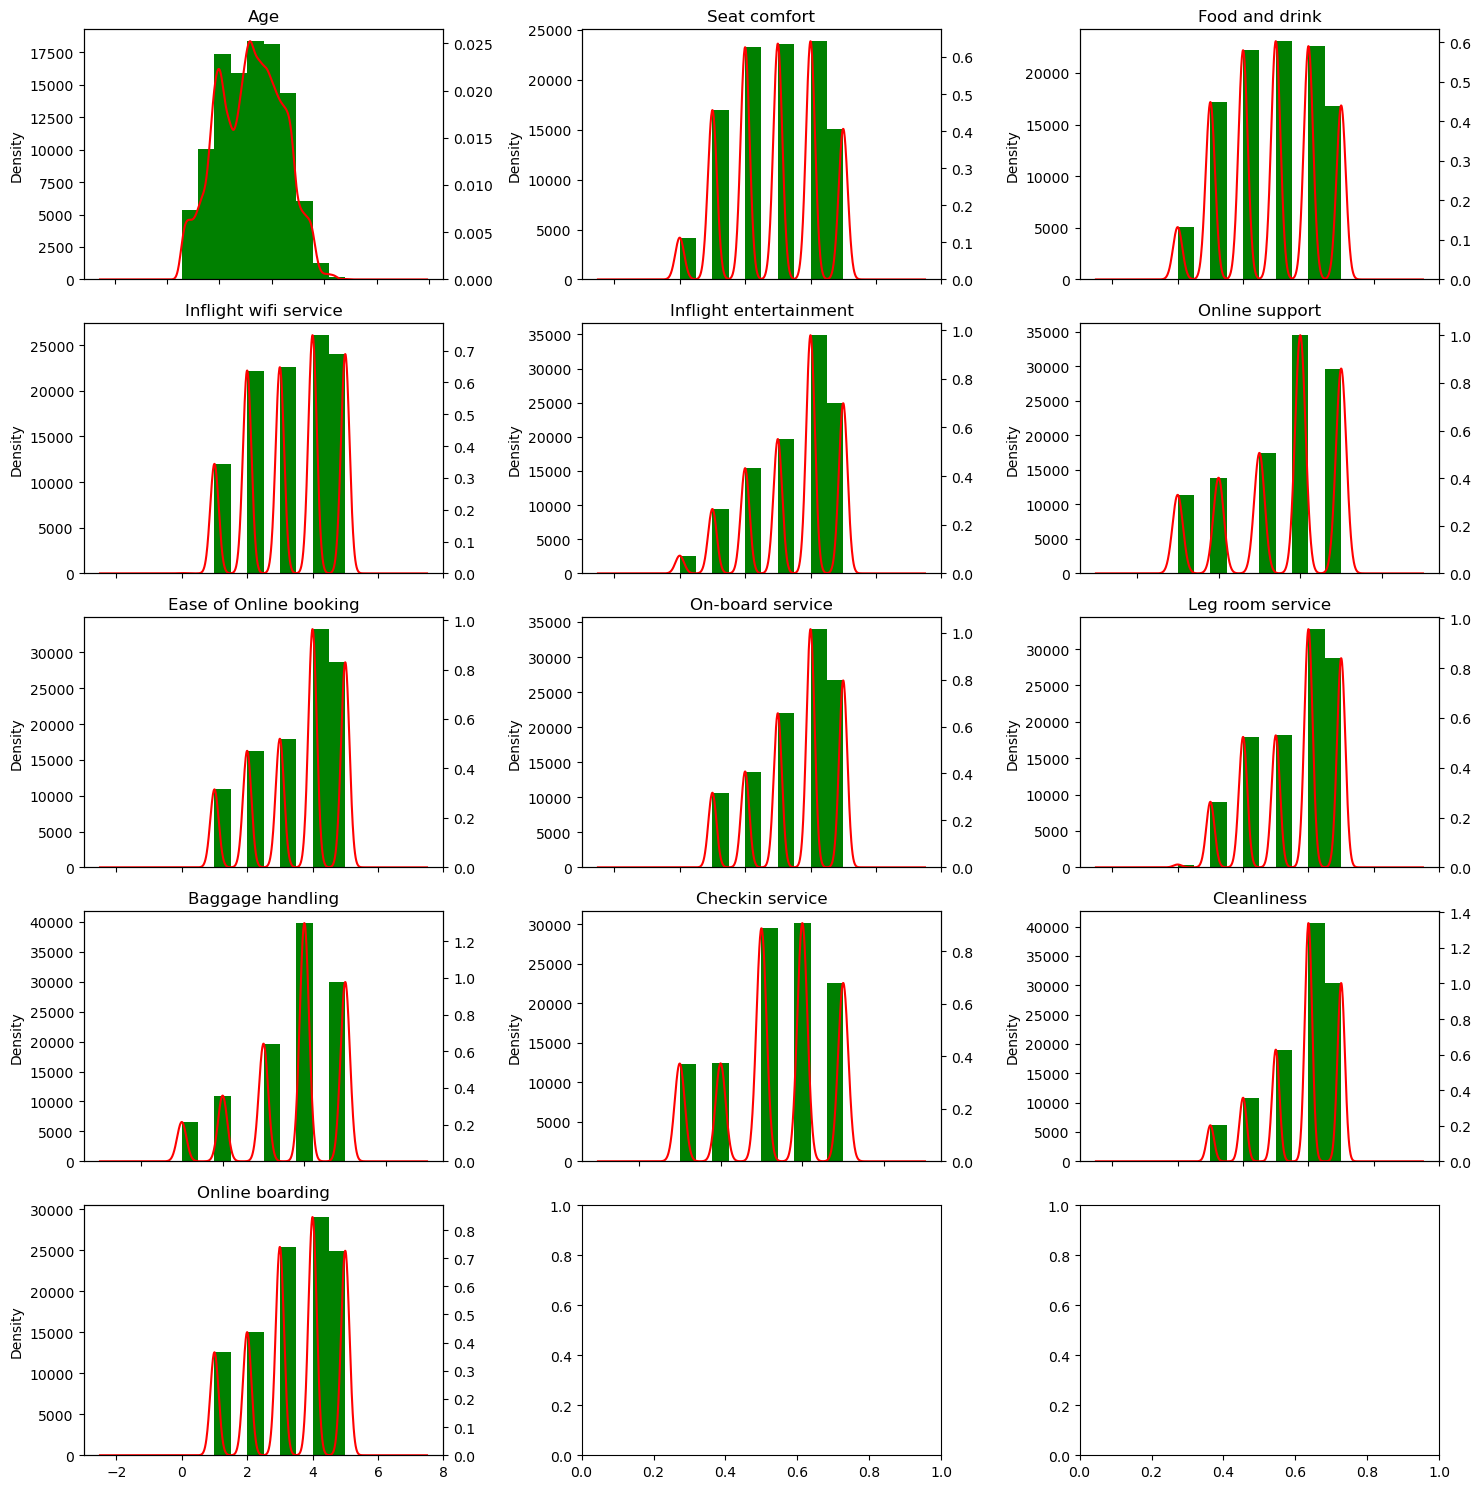

In [36]:
data_num = data[features]
k = len(data_num.columns)
n = 3
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(n * 5, m * 3))
for i, (name, col) in enumerate(data_num.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax, color='green')
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name, color='red')
    ax2.set_ylim(0)

fig.tight_layout()

## Barplot

In [37]:
from textwrap import wrap

In [38]:
data_copy = data.copy()

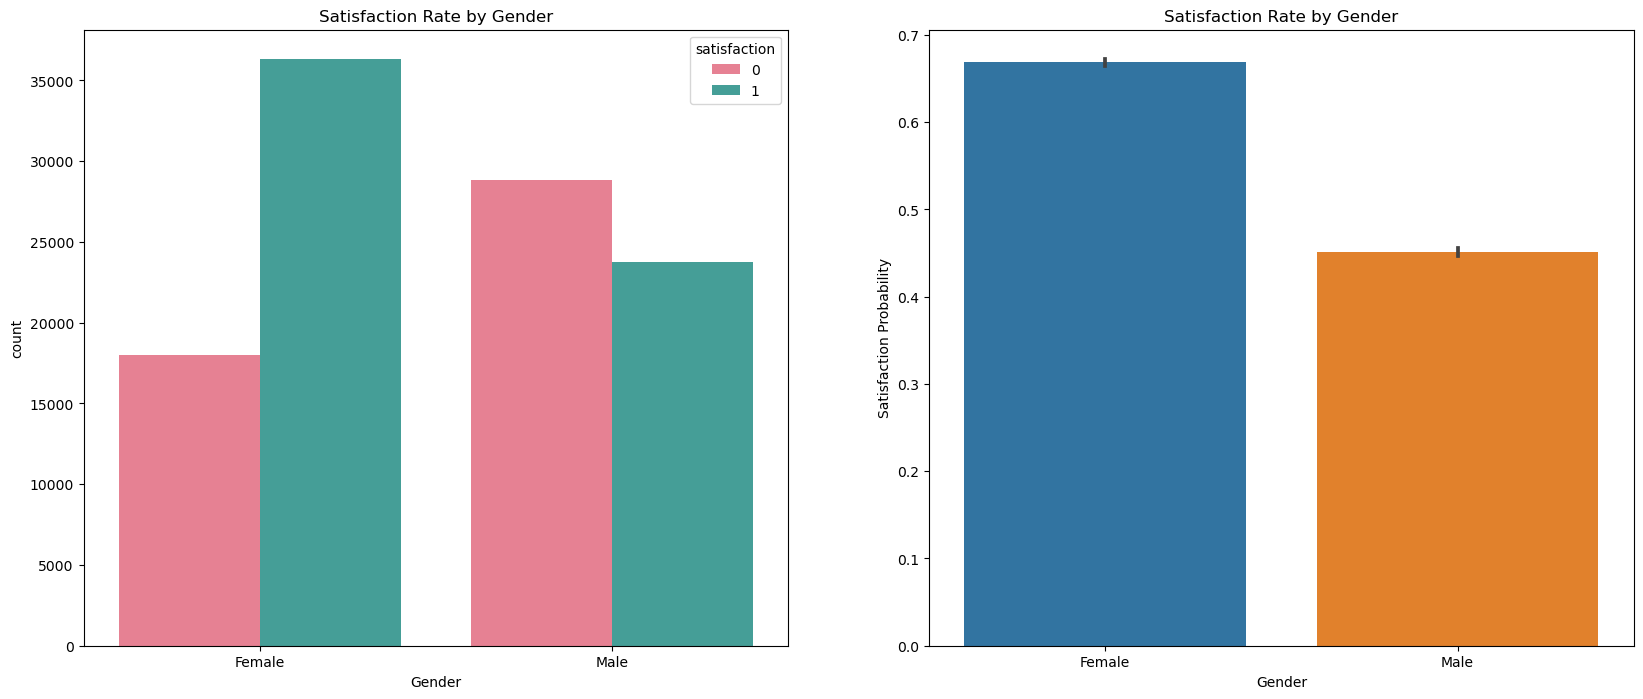

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
g = sns.countplot(x='Gender',hue='satisfaction',data=data,ax=ax1,palette='husl')
ax1.set_title('Satisfaction Rate by Gender')

g = sns.barplot(x="Gender",y="satisfaction",data=data, ax=ax2)
ax2.set_title('Satisfaction Rate by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Satisfaction Probability');

dari data visual diatas, pelanggan kita dengan jenis kelamin perempuan lebih banyak yg puas dibandingkan dengan laki-laki. dan rate kepuasan pelanggan kita juga lebih banyak pada **perempuan** dibandingkan dengan **laki-laki**

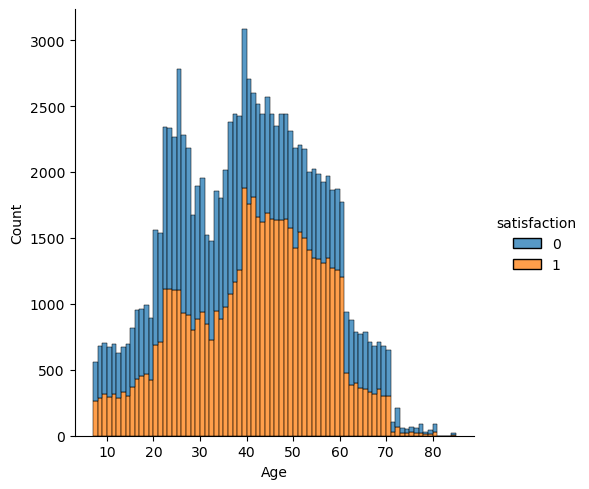

In [40]:
sns.displot(x='Age', hue='satisfaction', multiple='stack',data=data_copy,);

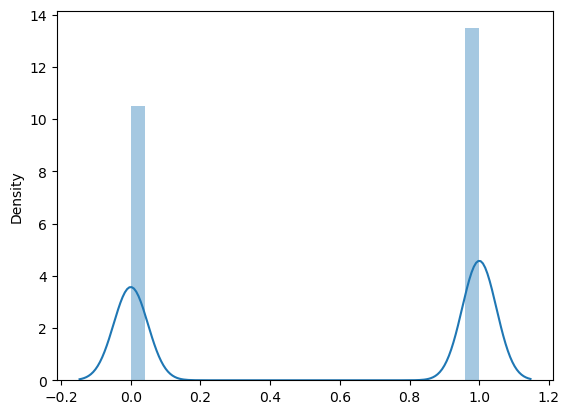

In [41]:
sns.distplot(x=data_copy['satisfaction']);

rata-rata persebaran umur **40-60** tahun tingkat satisfactionnya lebih besar disatisfied (0) dibandingkan dengan tingkat satisfiednya.

In [42]:
dfg = data_copy.groupby(['Class'])['satisfaction'].mean().reset_index()
dfg.head()

,Class,satisfaction
0,Business,0.723454
1,Eco,0.409864
2,Eco Plus,0.450781


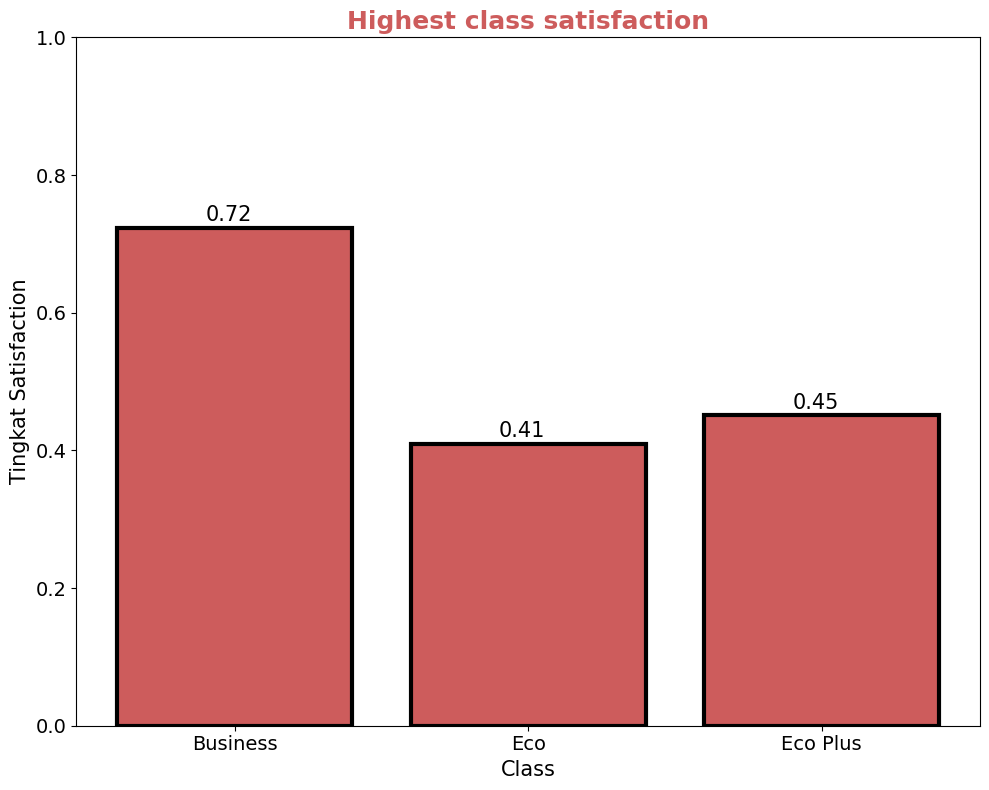

In [43]:
x = dfg['Class']
y = dfg['satisfaction']

plt.figure(figsize=(10,8))
barh = plt.bar(x=x, height=y, data=dfg, 
       color = 'indianred', # bar colors
       edgecolor= 'black', # edge bar colors
       linewidth = 3) # line width of bar

plt.title('Highest class satisfaction',color='indianred',fontsize=18,fontweight='bold')

plt.ylabel('Tingkat Satisfaction', fontsize=15) # y axis label
plt.xlabel('Class', fontsize=15) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)

x_numbers = range(len(x))
for i in x_numbers:
    plt.text(x = x_numbers[i]-0.1 , y = y[i]+0.01, s = round(y[i], 2), size = 15) # add data points

plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('Highest class satisfaction.png', tight_box=True)

Customer kita cenderung lebih puas pada pelayanan **class business** dengan nilai rata-rata **0.72**

## Group age by satisfaction

In [44]:
def age_group(x):
    if x['Age']<17:
        kategori = 'Child'
    elif x['Age'] >= 17 and x['Age'] <=30:
        kategori = 'Young Adults'
    elif x['Age'] >= 31 and x['Age'] <=45:
        kategori = 'Middle-aged Adults'  
    else:
        kategori = 'Old-aged Adults'
    return kategori

In [45]:
data_copy['age_group'] = data_copy.apply(lambda x: age_group(x), axis=1)
age_groupby = data_copy.groupby(['age_group']).agg({'satisfaction':'count'}).reset_index()
age_groupby.columns = ['age_group','count_satisfaction']
age_groupby.head()

,age_group,count_satisfaction
0,Child,7086
1,Middle-aged Adults,34268
2,Old-aged Adults,39928
3,Young Adults,25640


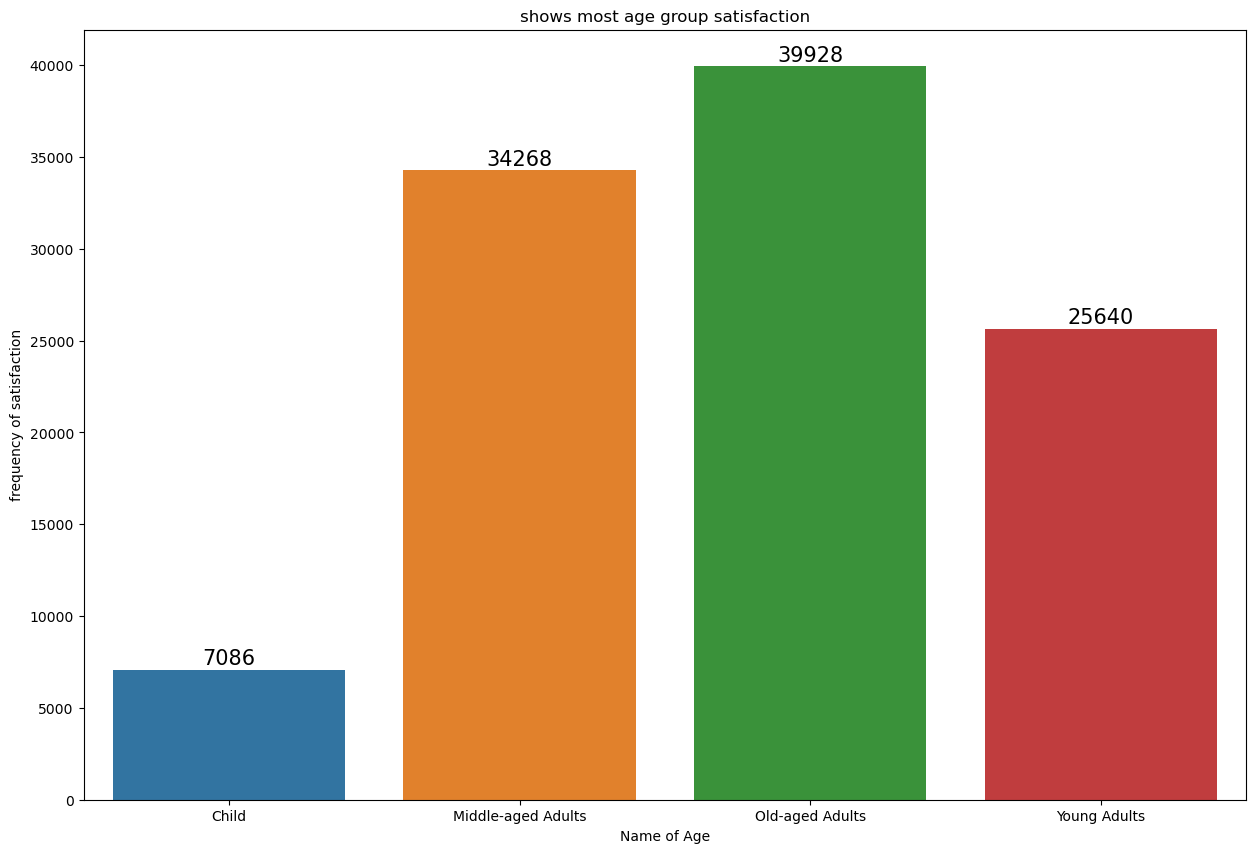

In [46]:
plt.subplots(figsize=(15,10))
ax = sns.barplot(x='age_group', y='count_satisfaction', data=age_groupby);

for bar in ax.patches: 
  ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=15, xytext=(0, 8), 
                    textcoords='offset points')

plt.title("shows most age group satisfaction")
plt.xlabel("Name of Age")
plt.ylabel("frequency of satisfaction")
loc, labels = plt.xticks()
ax.set_xticklabels(labels, rotation=0);

## Tingkat kepuasan berdasarkan service yang diberikan

Asumsi yang digunakan : Jika customer mengisi nilai 3-5 maka diasumsikan cenderung `Satisfied` terhadap service yang diberikan jika mengisi nilai 0-1 maka diasumsikan cenderung `Dissatisfied` terhadap service yang diberikan

In [47]:
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,FlightD_norm,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
2,1,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
3,1,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
4,1,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,0.0,1,0,1,0,0,1,0,1,0
5,1,Male,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,...,0.0,0,1,1,0,0,1,0,1,0


In [48]:
data_copy['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [49]:
data_copy['Passenger'] = 1

In [50]:
service = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 'Inflight wifi service','Inflight entertainment','Online support','Ease of Online booking','On-board service','Leg room service','Baggage handling','Checkin service','Cleanliness','Online boarding']

In [51]:
data_copy[service] = data_copy[service].replace((3,4,5), "satisfied")

In [52]:
data_copy[service] = data_copy[service].replace((0,1,2), "dissatisfied")

In [53]:
data_copy[service]

,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,dissatisfied,dissatisfied,dissatisfied,dissatisfied,dissatisfied,satisfied,dissatisfied,satisfied,satisfied,dissatisfied,satisfied,satisfied,satisfied,dissatisfied
2,dissatisfied,dissatisfied,dissatisfied,satisfied,dissatisfied,dissatisfied,dissatisfied,dissatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,dissatisfied
3,dissatisfied,dissatisfied,dissatisfied,satisfied,satisfied,satisfied,satisfied,dissatisfied,dissatisfied,dissatisfied,dissatisfied,satisfied,dissatisfied,satisfied
4,dissatisfied,dissatisfied,dissatisfied,satisfied,satisfied,satisfied,satisfied,dissatisfied,dissatisfied,dissatisfied,dissatisfied,satisfied,dissatisfied,satisfied
5,dissatisfied,dissatisfied,dissatisfied,satisfied,dissatisfied,dissatisfied,dissatisfied,dissatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129869,satisfied,dissatisfied,satisfied,satisfied,dissatisfied,satisfied,satisfied,dissatisfied,dissatisfied,dissatisfied,satisfied,satisfied,satisfied,dissatisfied
129871,satisfied,satisfied,satisfied,satisfied,dissatisfied,satisfied,dissatisfied,dissatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,dissatisfied
129872,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied,satisfied
129874,satisfied,satisfied,satisfied,dissatisfied,dissatisfied,satisfied,dissatisfied,dissatisfied,satisfied,satisfied,satisfied,satisfied,satisfied,dissatisfied


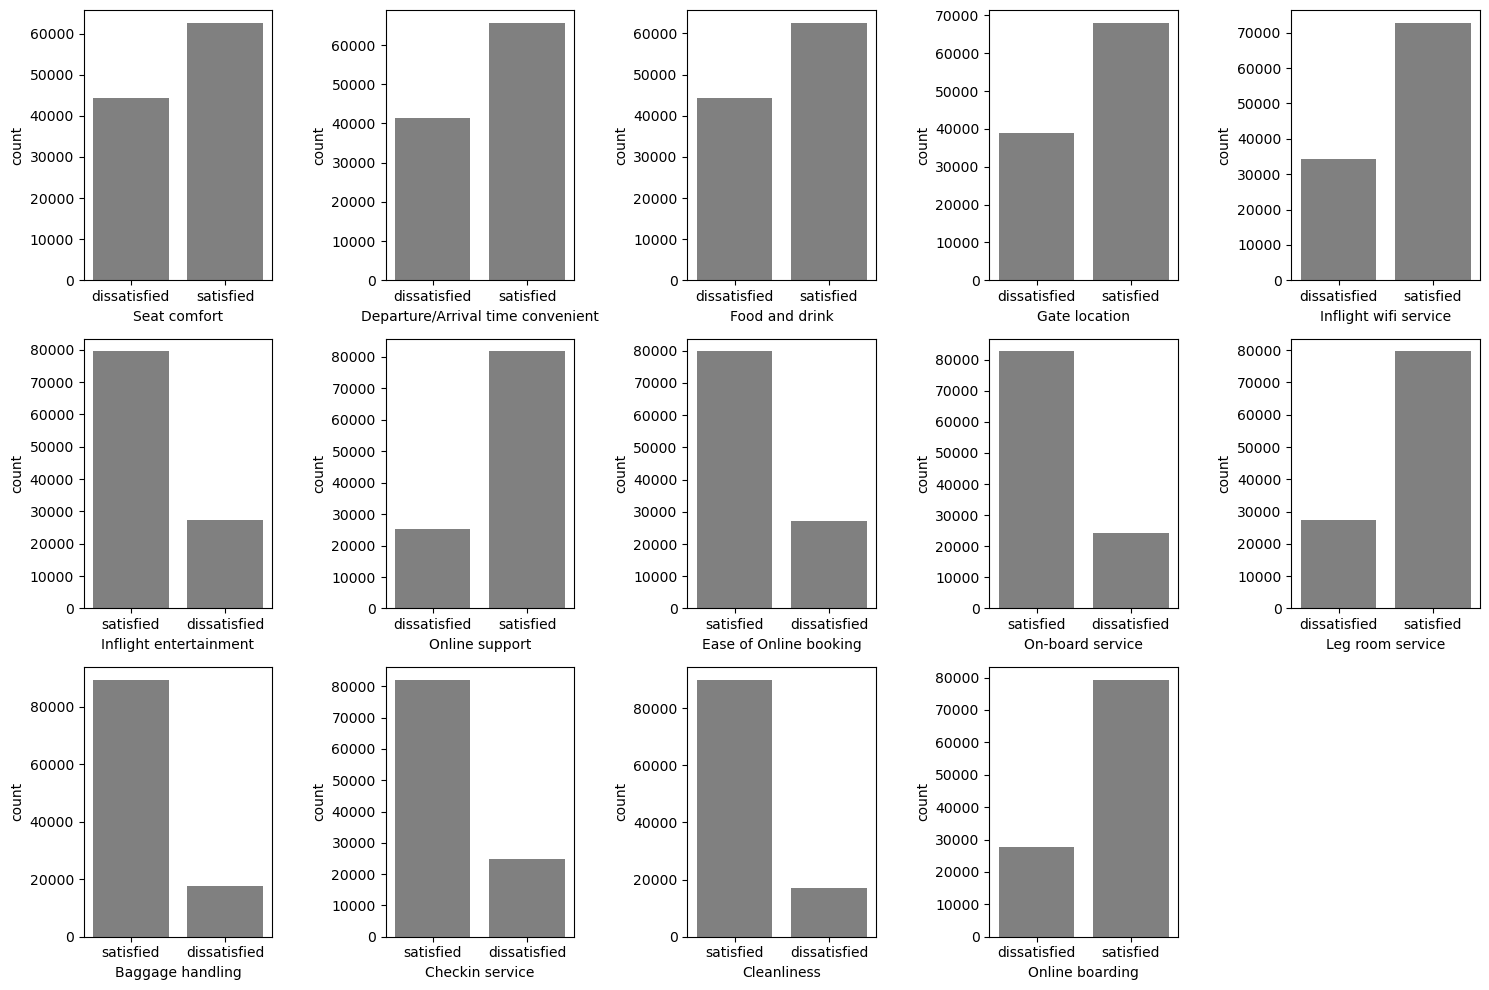

In [54]:
plt.subplots(figsize=(15,10))
for i in range(0, len(service)):
    plt.subplot(3, 5, i+1)
    sns.countplot(data_copy[service[i]], color='gray', orient='v')
    plt.tight_layout()


Jika dilihat dari selisih antara customer yang Satisfied dan Dissatisfied, Customer airline merasa puas pada service `Baggage handling`,`On Board Service`,`Cleanliness`, dan `Online Boarding`

# Logistic Regression

## Splitting Dataset

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106922 entries, 0 to 129875
Data columns (total 33 columns):
satisfaction                         106922 non-null int64
Gender                               106922 non-null object
Customer Type                        106922 non-null object
Age                                  106922 non-null int64
Type of Travel                       106922 non-null object
Class                                106922 non-null object
Flight Distance                      106922 non-null int64
Seat comfort                         106922 non-null int64
Departure/Arrival time convenient    106922 non-null int64
Food and drink                       106922 non-null int64
Gate location                        106922 non-null int64
Inflight wifi service                106922 non-null int64
Inflight entertainment               106922 non-null int64
Online support                       106922 non-null int64
Ease of Online booking               106922 non-null int64


In [56]:
data = data.drop(['Gender','Customer Type','Class','Type of Travel'],axis=1)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106922 entries, 0 to 129875
Data columns (total 29 columns):
satisfaction                         106922 non-null int64
Age                                  106922 non-null int64
Flight Distance                      106922 non-null int64
Seat comfort                         106922 non-null int64
Departure/Arrival time convenient    106922 non-null int64
Food and drink                       106922 non-null int64
Gate location                        106922 non-null int64
Inflight wifi service                106922 non-null int64
Inflight entertainment               106922 non-null int64
Online support                       106922 non-null int64
Ease of Online booking               106922 non-null int64
On-board service                     106922 non-null int64
Leg room service                     106922 non-null int64
Baggage handling                     106922 non-null int64
Checkin service                      106922 non-null int64
Clea

In [58]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

## Split Dataset (Train and Test)

In [59]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction'] # target / label

In [60]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelling

In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(Xtrain, ytrain)

LogisticRegression(random_state=42)

In [133]:
ypred = model.predict(Xtest)
ypred

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [134]:
ypred_train = model.predict(Xtrain)
ypred_train

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [135]:
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.77
Recall (Test Set): 0.87
F1-Score (Test Set): 0.82
AUC: 0.77


In [136]:
print("Recall (Train Set): %.2f" % recall_score(ytrain, ypred_train))

Recall (Train Set): 0.88


In [137]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 0.7899392076959049
Test score:0.786201951554073


## Hyperparameter Tuning

In [138]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
solver= ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = GridSearchCV(logres, hyperparameters, cv=5, scoring='precision')

# Fitting Model & Evaluation
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.83
Precision (Test Set): 0.85
Recall (Test Set): 0.85
F1-Score (Test Set): 0.85
AUC: 0.83


In [139]:
y_pred_train = model.predict(Xtrain)
print("Precision (Train Set): %.2f" % precision_score(ytrain, ypred_train))

Precision (Train Set): 0.78


In [140]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])
print('Best solver:', model.best_estimator_.get_params()['solver'])

Best algorithm: l2
Best C: 0.002
Best solver: newton-cg


In [141]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 0.8523505787857312
Test score:0.8499333777481679


## Confusion Matrix

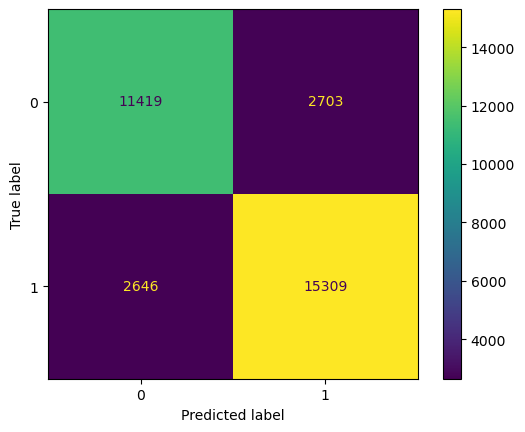

In [142]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, Xtest, ytest)  
plt.show() 

# Random Forest

## Split Dataset (Train and Test)

In [159]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction'] # target / label

In [160]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelling

In [161]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(Xtrain,ytrain)

ypred = rf.predict(Xtest)
eval_classification(rf, ypred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96
AUC: 0.95


In [162]:
print('Train score: ' + str(rf.score(Xtrain, ytrain))) #accuracy train score
print('Test score:' + str(rf.score(Xtest, ytest))) #accuracy test score

Train score: 0.9999866390540451
Test score:0.9540480718271659


## Feature Importance

Text(0.5, 1.0, 'feature importance score')

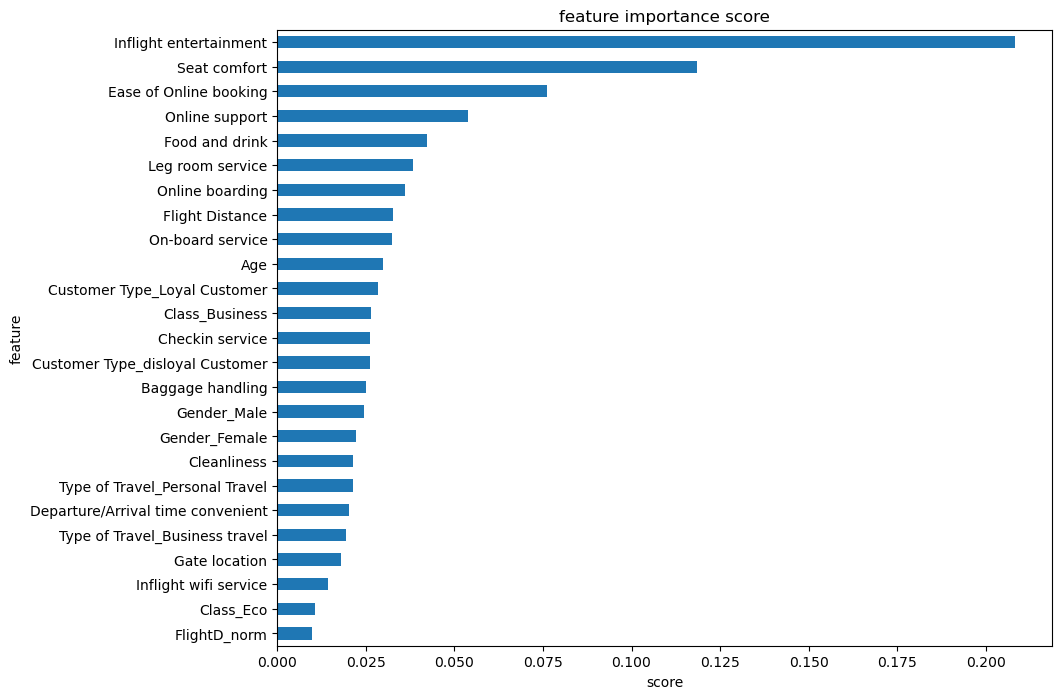

In [163]:
show_feature_importance(rf)

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [164]:
# Split Feature Vector and Label
X2 = data[['Inflight entertainment', 'Seat comfort', 'Ease of Online booking',
        'Online support', 'Food and drink','Leg room service','Online boarding',
        'Flight Distance','On-board service','Age']]

y2 = data['satisfaction']

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X2train, X2test, y2train, y2test = train_test_split(X2, y2, test_size = 0.3, random_state = 42)


rf = RandomForestClassifier(random_state=42)
rf.fit(X2train, y2train)
y2pred = rf.predict(X2test)
eval_classification(rf, y2pred, X2train, y2train, X2test, y2test)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.93
Recall (Test Set): 0.93
F1-Score (Test Set): 0.93
AUC: 0.92


## Confusion Matrix

In [149]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

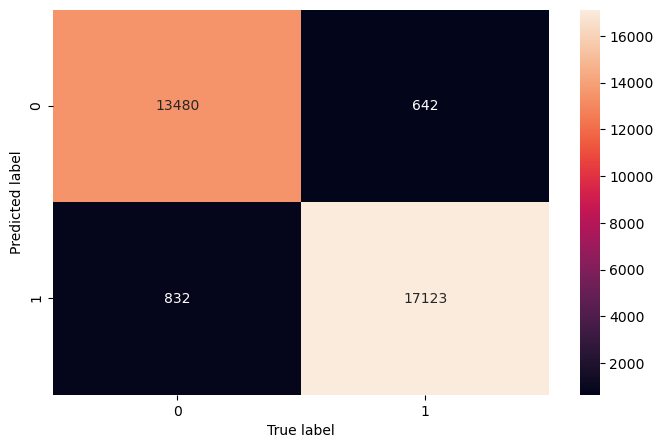

In [150]:
from sklearn.metrics import confusion_matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt=".0f", ax=ax)
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

In [151]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(ytest, ypred)
print(conf_mat)

[[13480   642]
 [  832 17123]]


In [152]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14122
           1       0.96      0.95      0.96     17955

    accuracy                           0.95     32077
   macro avg       0.95      0.95      0.95     32077
weighted avg       0.95      0.95      0.95     32077



## Hyperparameter Tuning

In [153]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], 
                                    # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
                                    # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                      )
# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='precision')
rf_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
ypred = rf_tuned.predict(Xtest)#Check performa dari model
eval_classification(rf_tuned, ypred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96
AUC: 0.95


In [154]:
# show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

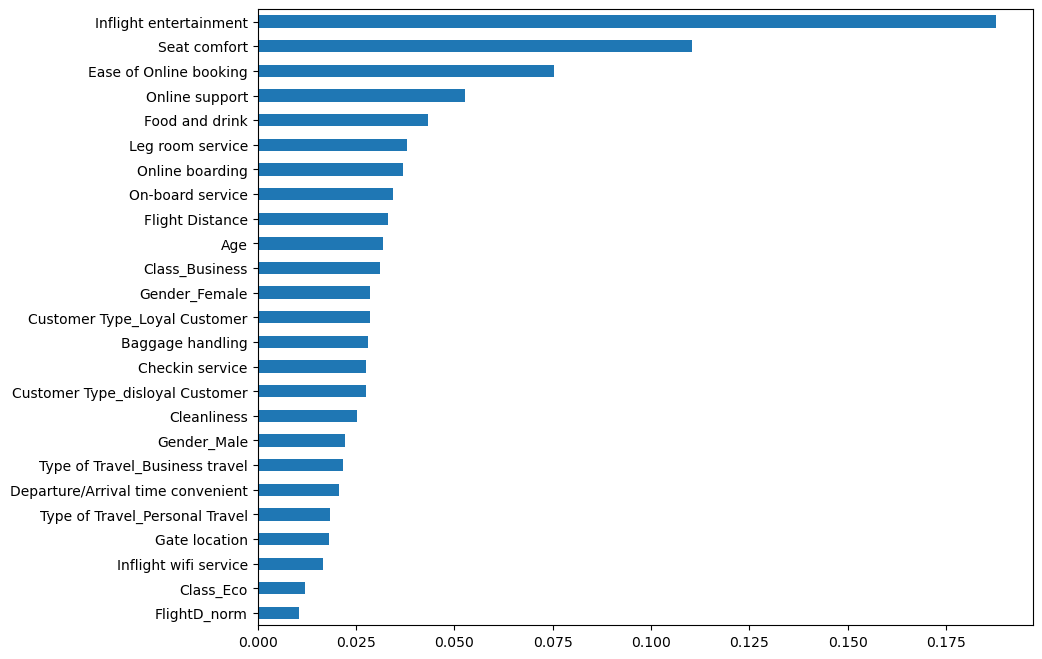

In [155]:
show_feature_importance(rf_tuned.best_estimator_)

In [156]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

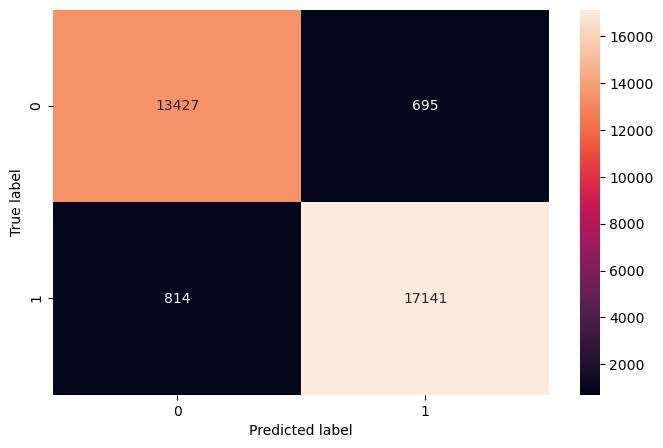

In [157]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ytest,ypred), annot=True, fmt=".0f", ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [158]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     14122
           1       0.96      0.95      0.96     17955

    accuracy                           0.95     32077
   macro avg       0.95      0.95      0.95     32077
weighted avg       0.95      0.95      0.95     32077



# Decision Tree

## Split Dataset (Train and Test)

In [165]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction'] # target / label

In [166]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelling

In [167]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(Xtrain,ytrain)

ypred = model.predict(Xtest)
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.93
Precision (Test Set): 0.94
Recall (Test Set): 0.94
F1-Score (Test Set): 0.94
AUC: 0.93


In [168]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 1.0
Test score:0.9318514823705458


## Hyperparameter Tuning

In [169]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best']

hyperparameters = dict(max_depth=[int(x) for x in np.linspace(1, 110, num = 30)], 
                       min_samples_split= [2, 5, 10, 100], 
                       min_samples_leaf=[1, 2, 4, 10, 20, 50],
                       max_features=['auto', 'sqrt'],
                       criterion=['gini','entropy'],
                       splitter=['best','random'],
                      )
# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='precision',n_jobs=-1)
model.fit(Xtrain, ytrain)

# Predict & Evaluation
ypred = model.predict(Xtest)#Check performa dari model
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

Accuracy (Test Set): 0.92
Precision (Test Set): 0.93
Recall (Test Set): 0.92
F1-Score (Test Set): 0.93
AUC: 0.92


In [170]:
print('Train score: ' + str(model.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(model.score(Xtest, ytest))) #accuracy

Train score: 0.9513289276928272
Test score:0.9320234869015357


In [171]:
model.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 98,
 'criterion': 'entropy'}

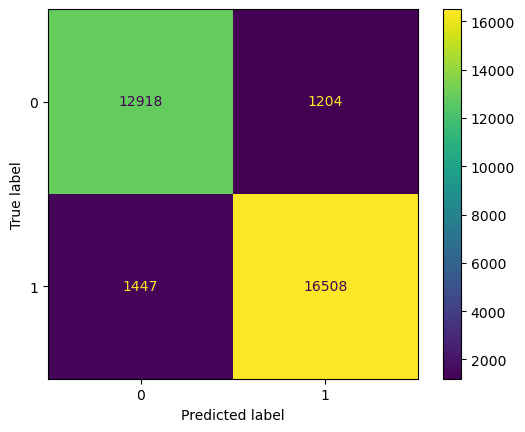

In [172]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, Xtest, ytest)  
plt.show() 

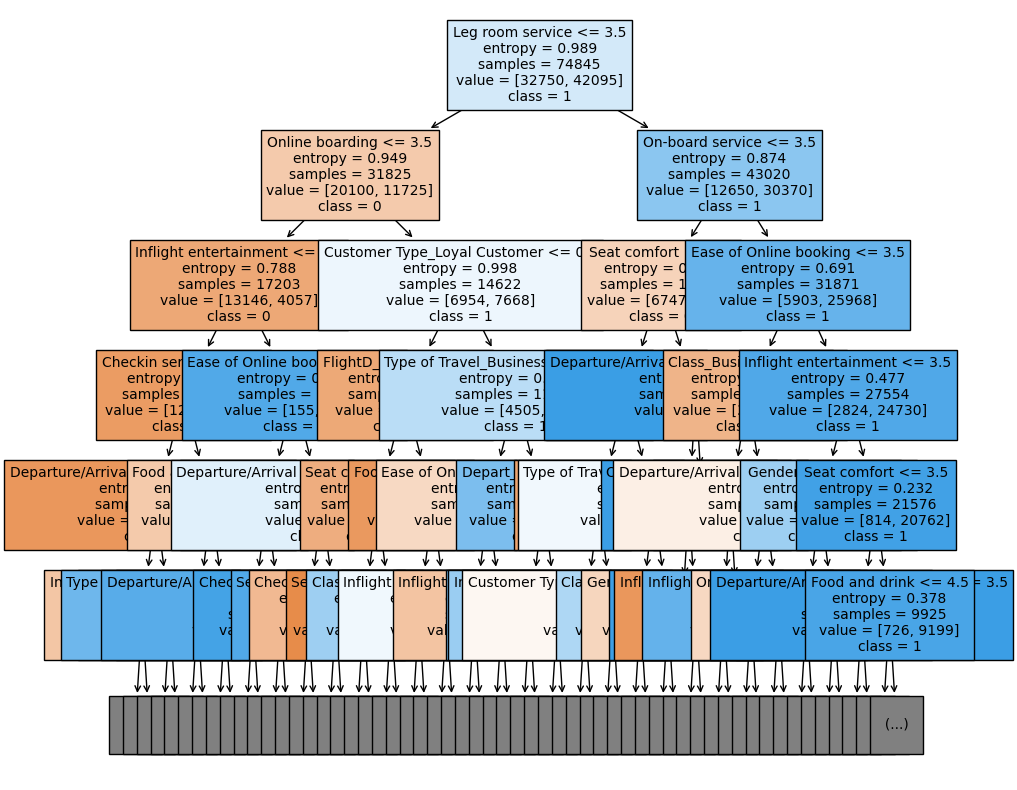

In [173]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

Text(0.5, 1.0, 'feature importance score')

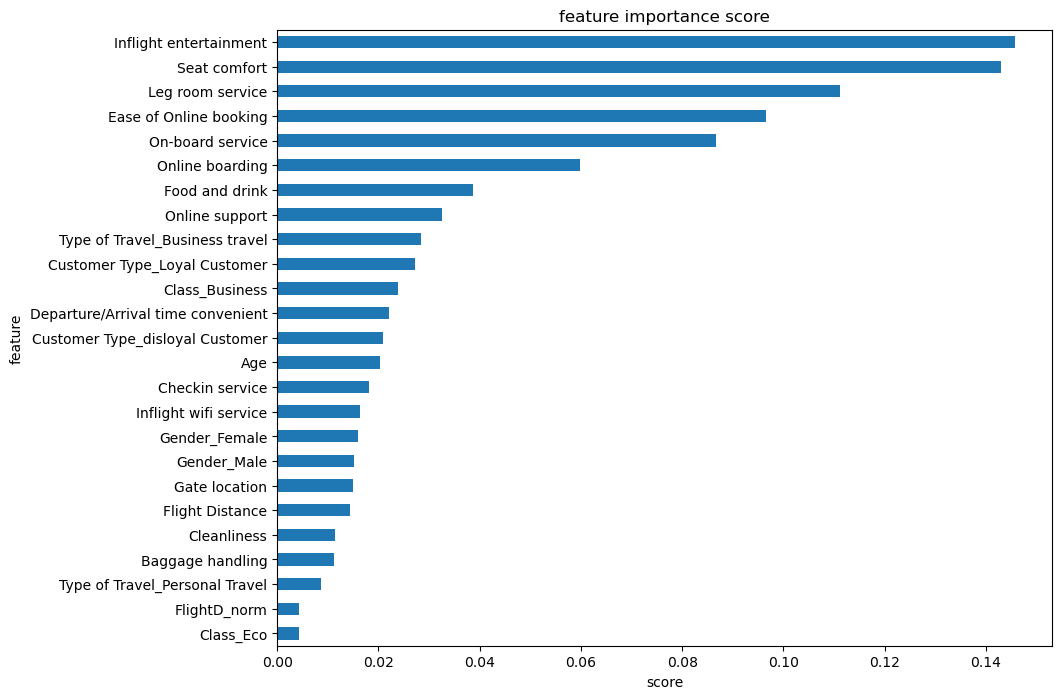

In [174]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [175]:
feat_importances

Age                                  0.020313
Flight Distance                      0.014415
Seat comfort                         0.142974
Departure/Arrival time convenient    0.022057
Food and drink                       0.038605
Gate location                        0.014935
Inflight wifi service                0.016402
Inflight entertainment               0.145771
Online support                       0.032525
Ease of Online booking               0.096642
On-board service                     0.086716
Leg room service                     0.111196
Baggage handling                     0.011218
Checkin service                      0.018200
Cleanliness                          0.011502
Online boarding                      0.059859
Departure Delay in Minutes           0.002753
Depart_norm                          0.003592
FlightD_norm                         0.004384
Gender_Female                        0.015967
Gender_Male                          0.015200
Customer Type_Loyal Customer      

# K Nearest Neighbor

## Split Dataset (Train and Test)

In [ ]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction'] # target / label

In [ ]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Modelling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

In [ ]:
print('Train score: ' + str(knn.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(knn.score(Xtest, ytest))) #accuracy

## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
from sklearn.neighbors import KNeighborsClassifier

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='precision')

# Fit Model & Evaluasi
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)
eval_classification(model, ypred, Xtrain, ytrain, Xtest, ytest)

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, Xtest, ytest)  
plt.show() 

# XGboost

In [62]:
!pip install xgboost

In [63]:
from xgboost import XGBClassifier, XGBRegressor
xg = XGBClassifier(random_state=42)
xg.fit(Xtrain, ytrain)

y_pred = xg.predict(Xtest)
eval_classification(xg, y_pred, Xtrain, ytrain, Xtest, ytest)

[23:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.95
Precision (Test Set): 0.96
Recall (Test Set): 0.95
F1-Score (Test Set): 0.96
AUC: 0.95


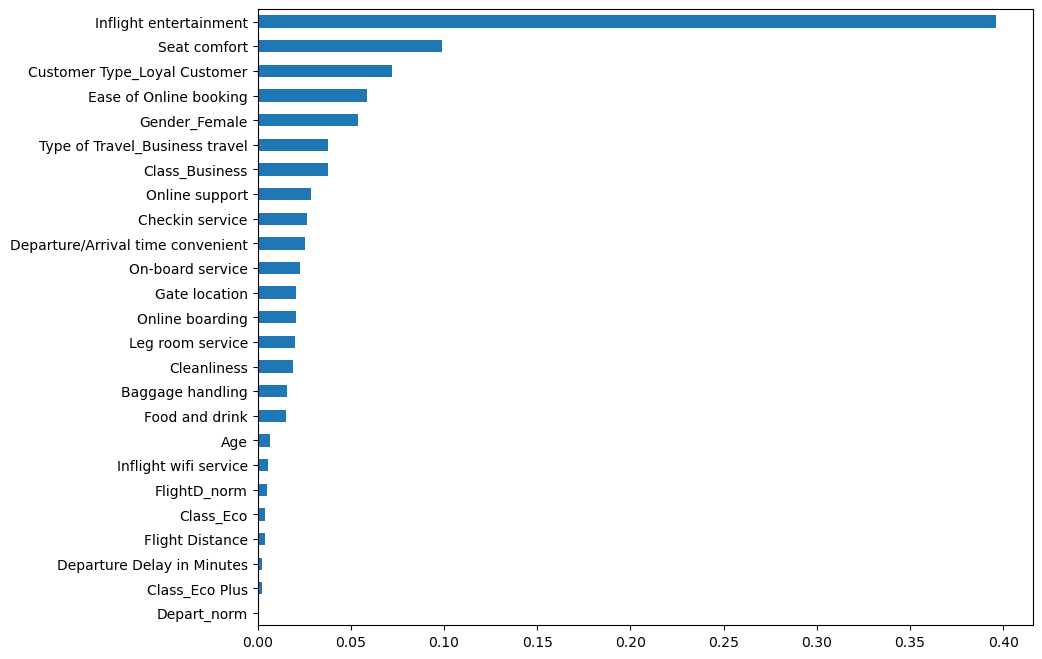

In [64]:
show_feature_importance(xg)

## Hyperparameter tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='precision')
xg_tuned.fit(Xtrain,ytrain)

# Predict & Evaluation
y_pred = xg_tuned.predict(Xtest)#Check performa dari model
eval_classification(xg_tuned, y_pred, Xtrain, ytrain, Xtest, ytest)

[00:11:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:11:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:11:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [73]:
feat_importances = pd.Series(xg_tuned.best_estimator_.feature_importances_, index=X.columns)
feat_importances

Age                                  0.005105
Flight Distance                      0.003141
Seat comfort                         0.112443
Departure/Arrival time convenient    0.013597
Food and drink                       0.016298
Gate location                        0.015079
Inflight wifi service                0.004182
Inflight entertainment               0.383584
Online support                       0.021242
Ease of Online booking               0.077549
On-board service                     0.017161
Leg room service                     0.017438
Baggage handling                     0.010503
Checkin service                      0.014414
Cleanliness                          0.011707
Online boarding                      0.018957
Departure Delay in Minutes           0.002412
Depart_norm                          0.002151
FlightD_norm                         0.004060
Gender_Female                        0.042970
Gender_Male                          0.007598
Customer Type_Loyal Customer      

Text(0.5, 1.0, 'feature importance score')

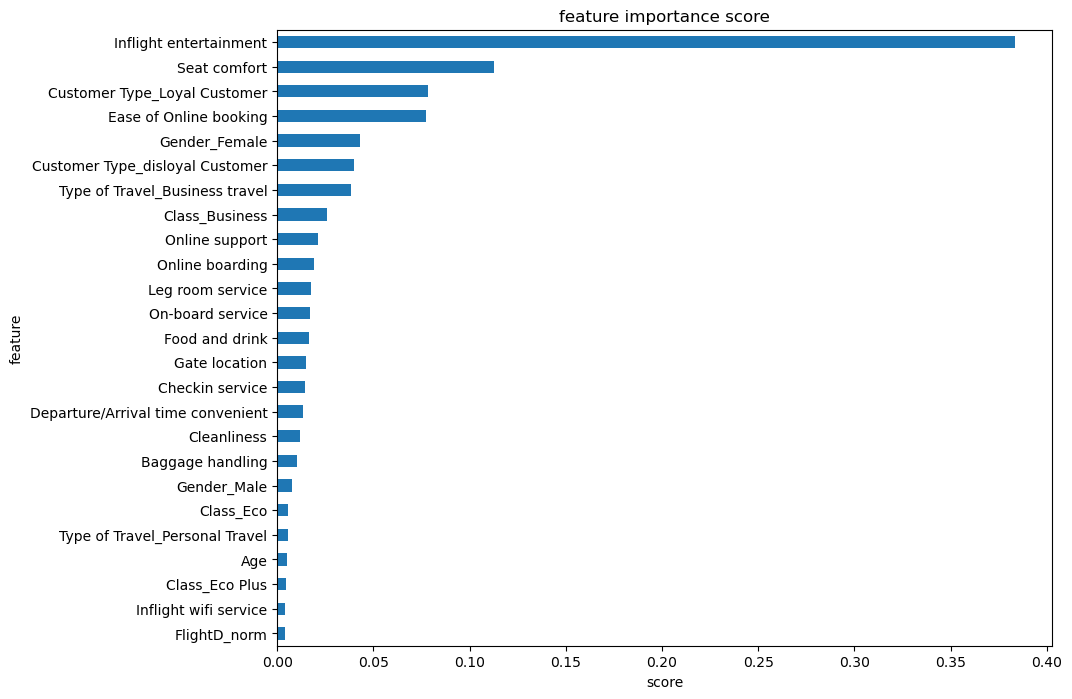

In [75]:
feat_importances = pd.Series(xg_tuned.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [76]:
print('Train score: ' + str(xg_tuned.score(Xtrain, ytrain))) #accuracy
print('Test score:' + str(xg_tuned.score(Xtest, ytest))) #accuracy

Train score: 0.9876889848812095
Test score:0.9665142018182845
